###  Data Entries: 
0 Bound, 1 Date + Time, 2 Seq No, 3 Lane, 4 Speed, 5 Class, 6 No of Axle, [ Axle Weight, Axle Spacing]

---
### <span style="color:red"> Methods and Procedures </span>


#### Data Cleaning
- Sort the data based on Date > Bound > lane   DONE
- obtain the Gap Time    DONE

#### Fitting and Regression
- Find the daily average vehicle flow  DONE
- Find the Variation in Traffic flow across different times of the day DONE
- Find the variation in LDV:HDV ratio across different times of the day  GAVE UP
- Find the variation in (Traffic Volume in hour)/(Traffic Volume in day) across different times of the day [Reference](https://medium.com/hal24k-techblog/a-guide-to-generating-probability-distributions-with-neural-networks-ffc4efacd6a4) 
- Find the PDF of the vehicle weight of LDV  DONE 
- Find the PDF of the vehicle weight of HDV  DONE
- Find the Relation between parameters with the below methods  

#### Monte Carlo Simluation
- Set up an environment for simulation. Refer to your IR. 
- Run for 2400 years (USE SEED to make sure the value is same every time) -> maybe do it a few times and take the average?
- Obtain max load effect. -> Transition to SAP2000
- Then maybe measure the load effect with varying parameters to plot a 3d surface. (but what parameters should I vary with?)

---

### Relationship between each entries: 
 - Time of the day -> Proportion of Vehicle Class
   - Vehicle Class -> Vehicle Speed ? Need to see if there is a relationship or not. 
      - Vehicle Class + Vehicle Speed -> Gap Time  
        //
   - Vehicle Class -> Axle Number 
      - Axle number -> Total Weight & Axle Weight

Multiple Lasso/Ridge Regression or polynomial regression would be used to draw the relationships of the above figures. 

### Assumptions and Relationships: 
- the Traffic composition relates to the time of the day
- Gap Time between vehicles is determined by the vehicle speed and the vehicle class ie. weight

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# def import_data():
all_data= pd.read_excel('output.xlsx')
    # return all_data
# usecols='A:I'

#### Calculates the Gap Time

In [7]:
# def cal_gap_distance():
# all_data = import_data()
# all_data.loc[:,'Seq No':'Class'].head()
all_data['Date + Time'] = pd.to_datetime(all_data['Date + Time'])
all_data['Date'] = pd.to_datetime(all_data['Date + Time']).dt.date
all_data['Date'].unique()

all_data = all_data.sort_values(['Date','Bound', 'Lane','Seq No'])

all_data['Same Bound'] = all_data['Bound'] == all_data['Bound'].shift(1)
all_data['Same Lane'] = all_data['Lane'] == all_data['Lane'].shift(1)    
# if all_data.loc['Bound'].eq(all_data.loc['Bound'].shift(1)) and all_data.loc['Lane'].eq(all_data.loc['Lane'].shift(1)):
#     all_data['Gap Time'] = all_data['Speed'] * (all_data['Date + Time'].shift(1) - all_data['Date + Time'])
# else:
#     all_data['Gap Time'] = pd.NA

filter1 = all_data['Same Bound'] == True
filter2 = all_data['Same Lane'] == True
not_filter1 = all_data['Same Bound'] == False
not_filter2 = all_data['Same Lane'] == False

change = all_data['Date + Time'].diff().dt.seconds
# all_data['Speed'] * (all_data['Date + Time'].shift(1) - all_data['Date + Time'])

all_data.loc[filter1 & filter2, 'Gap Time'] = change
all_data.loc[not_filter1, 'Gap Time'] = pd.NA
all_data.loc[not_filter2, 'Gap Time'] = pd.NA


# all_data = all_data.fillna(all_data['Gap Time'].mean())

cols = ['Gap Time']
all_data.loc[:,cols] = all_data.loc[:,cols].bfill()
    # return 
# cal_gap_distance()

/var/folders/py/yncddnwd6kn7d9dzfmz1kcbm0000gn/T/ipykernel_45764/1992310515.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Date + Time'] = pd.to_datetime(all_data['Date + Time'])


In [15]:
all_data.columns

Index(['Gap Distance', 'Total Weight', 'Bound', 'Date + Time', 'Seq No',
       'Lane', 'Speed', 'Class', 'No of Axle', 'Axle Weight 1',
       'Axle Spacing 1', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Date', 'Same Bound', 'Same Lane', 'Gap Time'],
      dtype='object')

In [16]:

subset = all_data.drop(columns=['Date + Time','Date']).loc[:,['Gap Time','Total Weight','Lane','Speed','Class','No of Axle']]
Weight_Gap_Corr = subset.corr().round(2)
Weight_Gap_Corr = Weight_Gap_Corr.abs()

def highlight_greater_than_7(val):
    """
    Takes a scalar and returns a string with
    the css property 'background-color: yellow' for
    values greater than 80, black otherwise.
    """
    color = 'green' if float(val) >= 0.7 else 'grey'
    return f'background-color: {color}'

Weight_Gap_Corr = Weight_Gap_Corr.style.applymap(highlight_greater_than_7)


Weight_Gap_Corr

,Gap Time,Total Weight,Lane,Speed,Class,No of Axle
Gap Time,1.000000,0.050000,0.040000,0.030000,0.040000,0.040000
Total Weight,0.050000,1.000000,0.390000,0.220000,0.760000,0.830000
Lane,0.040000,0.390000,1.000000,0.400000,0.390000,0.340000
Speed,0.030000,0.220000,0.400000,1.000000,0.170000,0.200000
Class,0.040000,0.760000,0.390000,0.170000,1.000000,0.720000
No of Axle,0.040000,0.830000,0.340000,0.200000,0.720000,1.000000


In [9]:
asdf

NameError: name 'asdf' is not defined

-------

It can be seen that there is not much relationship between Gap distace and Total Weight

There is relationship between speed and lane number, but should not affect the calculation of load effect. 


Class 1 - Motor cycles

Class 2 - Private cars


Class 3 - Light buses

Class 4 - Light Goods Vehicles

Class 5 - Medium Goods Vehicles

Class 6 - Rigid Heavy Goods Vehicles

Class 7 - Articulated Heavy Goods Vehicles

Class 8 - Buses and Coaches

Class 9 - Unclassified

## Average Vehicular Flow

In [ ]:
def avg_veh_flow():
    date_list = all_data['Date'].unique()
    avf_list = []
    for date in date_list: 
        avf_list.append(round(len(all_data[all_data['Date']==date].index),2))
    dict = {'Date': date_list, "Daily Vehicular Flow": avf_list}
    AVFdf = pd.DataFrame(dict)
    print(AVFdf)
    mean_vf = AVFdf["Daily Vehicular Flow"].mean()
    sd_vf = AVFdf["Daily Vehicular Flow"].std()
    return 

In [ ]:
def violin_plot_speed_and_gap_distance():
    date_list = all_data['Date'].unique()

    from statsmodels.graphics.boxplots import violinplot
    
    speed_list = []
    gap_list = []
    for date in date_list:
        speed_list.append(np.array(all_data[all_data['Date']==date]['Speed']))
        gap_list.append(np.array(all_data[all_data['Date']==date]['Gap Time']))


    fig, (ax1, ax2) = plt.subplots(1,2)
    violinplot(data=speed_list, ax=ax1, labels=date_list, side='right', show_boxplot=False)
    violinplot(data=gap_list, ax=ax2, labels=date_list, side='right', show_boxplot=False)
    # plt.xlabel('Date')
    # plt.ylabel('Speed (km/h)')
    plt.setp(ax1, ylim=[0,150], xlabel = 'Date', ylabel = 'Speed (km/h)')
    # plt.setp(ax2, ylim=[0,20000], xlabel = 'Date', ylabel = 'Gap Time (m)')
    plt.suptitle('Violin Plot of Speed and Gap Time')
    fig.tight_layout()
    fig.autofmt_xdate()    

    fig, ax1 = plt.subplots(1,1)
    violinplot(data=speed_list,ax=ax1 , labels=date_list, side='right', show_boxplot=False)
    plt.title('Violin Plot of Speed Against Different Days')
    plt.setp(ax1, ylim=[0,150], xlabel = 'Date', ylabel = 'Speed (km/h)')
    fig.tight_layout()
    fig.autofmt_xdate()
    plt.show()

    fig, ax1 = plt.subplots(1,1)
    violinplot(data=gap_list, ax=ax1, labels=date_list, side='right', show_boxplot=False)
    plt.setp(ax1, ylim=[0,20000], xlabel = 'Date', ylabel = 'Gap Time (m)')
    plt.title('Violin Plot of Gap Time Against Different Days')
    fig.tight_layout()
    fig.autofmt_xdate()
    plt.show()
    return

## Hourly Vehicular Flow

#### This assumes that all data are measured from the same bridge. Since for different bridges, the number of lanes would affect the expected vehicular flow.

### in Unit of Minutes

In [ ]:
from datetime import time as t
def generate_time(time_list):
    for h in range(24):
        for m in range(60):
            time_list.append(t(h,m).strftime("%H:%M"))
    return


def vehicular_flow_in_minutes_setup():
    # Create the Time column, where it is in the string format of hour:minute in 1 minute increments
    all_data['Time'] = all_data['Date + Time'].dt.round('1min')
    all_data['Time'] = all_data['Time'].dt.strftime("%H:%M")

    # Make a time list to store all the x data from 00:00 to 23:59
    time_list = []
    generate_time(time_list)
    dict = {"Time": time_list}

    # Loops over the number of recorded dates
    total_entries = 0
    for date in date_list:
        vehicle_flow = []
        # Loops over each minute
        for time in time_list:
            # Tallies the number of vehicle that is recorded in that minute. -> convert the unit from veh/min to veh/hr
            # ? Times 60 for the total numebr of cars to convert: cars per min to cars per hour
            vehicle_flow.append(len(all_data[(all_data['Date']==date) & (all_data['Time']==time)].index) * 60)

        dict[date] = vehicle_flow
        for item in vehicle_flow:
            total_entries += item / 60

    VF_testing = pd.DataFrame(dict)
    return VF_testing, time_list

In [ ]:
def vehicular_flow_in_minutes():
    VF_testing, time_list = vehicular_flow_in_minutes_setup()
    for date in date_list:
        # removes the time data for when there is no vehicle recorded
        tmp = np.array(VF_testing[date].astype(float))
        tmp[tmp==0] = np.nan
        plt.plot(VF_testing['Time'], VF_testing[date], label=date)
    plt.xticks(time_list[::60], rotation=70)
    plt.legend()
    plt.grid()
    plt.xlabel('Time of Day')
    plt.ylabel('Vehicular Flow (veh/h)')
    plt.title('Variations in Vehicular Flow Across Different Times of Day')
    plt.tight_layout()
    plt.show()
    return
# vehicular_flow_in_minutes()

In [ ]:

def vehicular_flow_in_minutes_scatter_plot():
    VF_testing, time_list = vehicular_flow_in_minutes_setup()

    for date in date_list:
        tmp = np.array(VF_testing[date].astype(float))
        tmp[tmp==0] = np.nan
        plt.scatter(VF_testing['Time'], tmp, label=date)
        # plt.plot(VF_testing['Time'], VF_testing[date], label=date)
    plt.xticks(time_list[::60], rotation=70)
    plt.legend()
    plt.grid()
    plt.xlabel('Time of Day')
    plt.ylabel('Vehicular Flow (veh/h)')
    plt.title('Variations in Vehicular Flow Across Different Times of Day')
    plt.tight_layout()
    plt.show()
    return
# vehicular_flow_in_minutes_scatter_plot()

### In Unit of Hours

In [ ]:
from datetime import time as t

def vehicular_flow_in_hours_setup():
        
    def generate_time(time_list):
        for h in range(24):
            time_list.append(t(h).strftime("%H"))
        return

    # Create the Time column, where it is in the string format of hour:minute in 1 minute increments
    all_data['Time'] = all_data['Date + Time'].dt.floor('h')
    all_data['Time'] = all_data['Time'].dt.strftime("%H")

    # Make a time list to store all the x data from 00:00 to 23:59
    time_list = []
    generate_time(time_list)
    dict = {"Time": time_list}

    # Loops over the number of recorded dates
    for date in date_list:
        vehicle_flow = []
        # Loops over each minute
        for time in time_list:
            # Tallies the number of vehicle that is recorded in that minute. -> convert the unit from veh/min to veh/hr
            # ? Times 60 for the total numebr of cars to convert: cars per min to cars per hour
            tmp = all_data[(all_data['Date']==date) & (all_data['Time']==time)]
            hourly_flow = len(tmp.index)
            if hourly_flow < 100: 
                hourly_flow = 0
            vehicle_flow.append(hourly_flow)
        dict[date] = vehicle_flow
    # print()
    VF_testing = pd.DataFrame(dict)

    # Finding the Average Values
    VF_testing['Total'] = VF_testing.iloc[:,1:6].sum(axis=1)
    VF_testing['Unique Dates'] = VF_testing.iloc[:,1:6].astype(bool).sum(axis=1)

    VF_testing['Average'] = VF_testing['Total'] / VF_testing['Unique Dates'] 
    
    return VF_testing, time_list

In [ ]:
def vehicular_flow_in_hours():
    from datetime import time as t

    VF_testing, time_list = vehicular_flow_in_hours_setup()
    print(len(time_list))
    # Print one with the 0 value
    for date in date_list:
        # removes the time data for when there is no vehicle recorded
        tmp = np.array(VF_testing[date].astype(float))
        tmp[tmp==0] = np.nan
        
        plt.plot(VF_testing['Time'], VF_testing[date], label=date)
        # plt.plot(VF_testing['Time'], VF_testing[date], label=date)

    plt.xticks(time_list, rotation=70)
    plt.legend()
    plt.grid()
    plt.xlabel('Time of Day')
    plt.ylabel('Vehicular Flow (veh/h)')
    plt.title('Variations in Vehicular Flow Across Different Times of Day')
    plt.tight_layout()
    plt.show()


    # Print one without 0 values
    date_list = all_data['Date'].unique()
    for date in date_list:
        # removes the time data for when there is no vehicle recorded
        tmp = np.array(VF_testing[date].astype(float))
        tmp[tmp==0] = np.nan
        
        plt.plot(VF_testing['Time'], tmp, label=date)
        # plt.plot(VF_testing['Time'], VF_testing[date], label=date)

    plt.xticks(time_list, rotation=70)
    plt.legend()
    plt.grid()
    plt.xlabel('Time of Day')
    plt.ylabel('Vehicular Flow (veh/h)')
    plt.title('Variations in Vehicular Flow Across Different Times of Day')
    plt.tight_layout()
    plt.show()
    return

def vehicular_flow_in_hours_scatter_plot():

    VF_testing, time_list = vehicular_flow_in_hours_setup()
    # Scatter Plot
    for date in date_list:
        # removes the time data for when there is no vehicle recorded
        tmp = np.array(VF_testing[date].astype(float))
        tmp[tmp==0] = np.nan
        
        plt.scatter(VF_testing['Time'], tmp, label=date)
        # plt.plot(VF_testing['Time'], VF_testing[date], label=date)

    plt.xticks(time_list, rotation=70)
    plt.legend()
    plt.grid()
    plt.xlabel('Time of Day')
    plt.ylabel('Vehicular Flow (veh/h)')
    plt.title('Variations in Vehicular Flow Across Different Times of Day')
    plt.tight_layout()
    plt.show()
    return

# vehicular_flow_in_hours()
# vehicular_flow_in_hours_scatter_plot()

#### Now Taking the Average Value across each day

In [ ]:
# def generate_time(time_list):
#     for h in range(24):
#         time_list.append(t(h).strftime("%H"))
#     return

# # Create the Time column, where it is in the string format of hour:minute in 1 minute increments
# all_data['Time'] = all_data['Date + Time'].dt.floor('h')
# all_data['Time'] = all_data['Time'].dt.strftime("%H")

# # Make a time list to store all the x data from 00:00 to 23:59
# time_list = []
# generate_time(time_list)
# dict = {"Time": time_list}

# vehicle_flow = []
# # Loops over each minute
# for time in time_list:
#     # Tallies the number of vehicle that is recorded in that minute. -> convert the unit from veh/min to veh/hr
#     # ? Times 60 for the total numebr of cars to convert: cars per min to cars per hour
#     tmp = all_data[all_data['Time']==time]
#     no_of_dates_involved = len(tmp['Date'].unique())
#     if no_of_dates_involved != 0:
#         hourly_flow_value = len(tmp.index) / no_of_dates_involved
#     vehicle_flow.append(hourly_flow_value)
#     dict['Vehicle Flow'] = vehicle_flow

# VF_testing = pd.DataFrame(dict)

In [ ]:
def vehicular_flow_in_hours_with_average_and_scatter():

    VF_testing, time_list = vehicular_flow_in_hours_setup()

    # graph plot the average value
    plt.plot(time_list, VF_testing['Average'],'.-', label='Average')


    # Scatter Plot
    for date in date_list:
        # removes the time data for when there is no vehicle recorded
        tmp = np.array(VF_testing[date].astype(float))
        tmp[tmp==0] = np.nan
        
        plt.scatter(VF_testing['Time'], tmp, label=date)

    plt.xticks(time_list, rotation=70)
    plt.legend(loc=0)
    plt.grid()
    plt.xlabel('Time of Day (24 hour format)')
    plt.ylabel('Vehicular Flow (veh/h)')
    plt.title('Variations in Hourly Vehicular Flow Across Different Times of Day')
    plt.tight_layout()
    plt.show()
    return 

# vehicular_flow_in_hours_with_average_and_scatter()


In [ ]:
# # Defining Data
# VF_testing, time_list = vehicular_flow_in_hours_setup()
# tmp = VF_testing.dropna(subset=["Average"])

# # Building NN 
# from keras.models import Sequential
# from keras.layers import Dense

# X_train       = tmp['Time'].astype(float)
# y_train       = tmp['Average'].astype(float)

# # essential preprocessing: imputation; substitute any 'NaN' with mean value 
# X_train      = X_train.fillna(X_train.mean())


# # parameters for keras
# input_dim        =  1 # number of neurons in the input layer
# n_neurons        = 100       # number of neurons in the first hidden layer
# # epochs           = 1000      # number of training cycles
# epochs           = 1      # number of training cycles

# # keras model
# model = Sequential()        # a model consisting of successive layers
# # input layer
# model.add(Dense(n_neurons, input_dim=input_dim, 
#                 kernel_initializer='normal', 
#                 activation='relu'))
# # output layer, with one neuron
# model.add(Dense(n_neurons, activation = 'relu'))
# model.add(Dense(n_neurons, activation = 'relu'))
# model.add(Dense(n_neurons, activation = 'relu'))
# model.add(Dense(n_neurons, activation = 'sigmoid'))
# model.add(Dense(n_neurons, activation = 'relu'))
# model.add(Dense(n_neurons, activation = 'relu'))
# model.add(Dense(n_neurons, activation = 'relu'))
# model.add(Dense(n_neurons, activation = 'sigmoid'))
# model.add(Dense(n_neurons, activation = 'relu'))
# model.add(Dense(n_neurons, activation = 'relu'))
# model.add(Dense(n_neurons, activation = 'relu'))
# model.add(Dense(n_neurons, activation = 'relu'))
# model.add(Dense(1, kernel_initializer='normal'))
# # compile the model
# model.compile(loss='mean_squared_error', optimizer='adam')

# # train the model
# history = model.fit(X_train,y_train, epochs=epochs, verbose=1, validation_split=0.1)

# # use the model to predict the prices for the test data
# y_predicted = model.predict(X_train)


In [ ]:
# # Compute the output 
# y_predicted = model.predict(X_train)

# # X_train = sc.inverse_transform(X_train)

# # Display the result
# plt.plot(X_train, y_train)
# plt.plot(X_train, y_predicted, 'r', linewidth=4)
# plt.xticks(VF_testing['Time'].astype(int), rotation=70)
# plt.legend(loc=0)
# plt.grid()
# plt.xlabel('Time of Day (24 hour format)')
# plt.ylabel('Vehicular Flow (veh/h)')
# plt.title('Variations in Hourly Vehicular Flow Across Different Times of Day')
# plt.tight_layout()
# plt.show()

# # Extract the loss values from the training history
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']

# # Plot the learning curve
# plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
# plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Learning Curve')
# plt.legend()
# plt.show()

## ABANDONED (LDV : HDV at Varying Times of the Day)

In [ ]:
# # print(time_list[::60])
# dict = {"Time": time_list}

# all_data['Hour'] = all_data['Date + Time'].dt.round('1h')
# all_data['Hour'] = all_data['Hour'].dt.strftime("%H:%M")


# for date in date_list:
#     LDV_vehicle_flow = []
#     HDV_vehicle_flow = []
#     for time in time_list:
#         # ? Times 60 for the total numebr of cars to convert: cars per min to cars per hour
#         LDV_vehicle_flow.append(len(all_data[(all_data['Date']==date) & (all_data['Hour']==time) & (all_data['Class'].astype(int)<=2)].index) * 60)
#         HDV_vehicle_flow.append(len(all_data[(all_data['Date']==date) & (all_data['Hour']==time) & (all_data['Class'].astype(int)>2)].index) * 60)

#     dict[date.strftime("%Y%M%D") + 'LDV'] = LDV_vehicle_flow
#     dict[date.strftime("%Y%M%D") + 'HDV'] = HDV_vehicle_flow

#     print(len(vehicle_flow))

#     LDV_HDV_testing = pd.DataFrame(dict)

import numpy as np
import matplotlib.pyplot as plt
from datetime import time as t

def generate_time(time_list):
    for h in range(24):
        for m in range(60):
            time_list.append(t(h,m))
    return

total_list = []
time_list = []
generate_time(time_list)

for date in date_list:
    # print(LDV_HDV_testing[date.strftime("%Y%M%D") + 'LDV'])
    # print(np.array(LDV_HDV_testing[date.strftime("%Y%M%D") + 'LDV']))
    total_list = np.concatenate((total_list, (np.array(LDV_HDV_testing[date.strftime("%Y%M%D") + 'LDV']))))
time_list = time_list * len(date_list)

print(len(total_list))
print(len(time_list))

plt.scatter(total_list, time_list, label=date)
plt.xticks(time_list[::60], rotation=70)
plt.legend()
plt.grid()
plt.xlabel('Time of Day')
plt.ylabel('Vehicular Flow (veh/h)')
plt.title('Variations in Vehicular Flow Across Different Times of Day')
plt.tight_layout()
plt.show()

## LDV to HDV Ratio

In [10]:
# def find_LDV_to_HDV_ratio():
# HDV
HDV = all_data.loc[(all_data['Class'].astype(int) > 2)| ((all_data['Class'].astype(int) <= 2) & (all_data['Total Weight'].astype(int) > 6000))]
total_trucks = HDV[HDV.columns[0]].count()
# LDV - Private Vehicle and Motorbikes
PV = all_data.loc[(all_data['Class'].astype(int) <= 2) & (all_data['Total Weight'].astype(int) >= 1500) & (all_data['Total Weight'].astype(int) <= 6000) ]
# PV['Total Weight'].mode
total_cars = PV[PV.columns[0]].count()

# LDV - Motorbike
MB = all_data.loc[(all_data['Class'].astype(int) <= 2) & (all_data['Total Weight'].astype(int) < 1500) ]
total_motorbikes = MB[MB.columns[0]].count()

print([total_trucks,total_cars,total_motorbikes])
print(sum([total_trucks,total_cars,total_motorbikes]))
    # return HDV, PV, MB, total_trucks,total_cars,total_motorbikes

[32483, 29276, 25743]
87502


[32483, 55019]


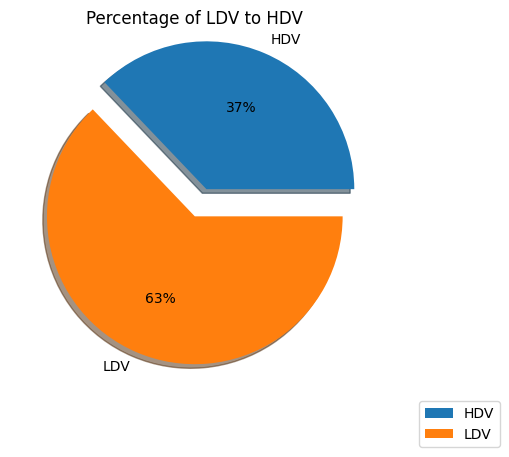

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# def show_pie_chart():
# HDV, PV, MB, total_trucks,total_cars,total_motorbikes = find_LDV_to_HDV_ratio()
# pie_chart_labels = ['HDV','LDV - cars','LDV - motorbikes']
pie_chart_labels = ['HDV','LDV']
myexplode = [0.2,0]

print([total_trucks,total_cars+total_motorbikes])

plt.pie(np.array([total_trucks,total_cars+total_motorbikes]),labels = pie_chart_labels, explode = myexplode, shadow = True, autopct='%1.0f%%')
plt.legend(title = "", bbox_to_anchor=(1,0), loc="lower right", bbox_transform=plt.gcf().transFigure)
plt.title('Percentage of LDV to HDV')
plt.grid()
plt.show()
# return

## Private Vehicle Weight Distribution. referenced from [Here](https://colab.research.google.com/drive/11A5Td8nxGSbThzL0NPwwv-E5GpBa0Fv9#scrollTo=sMvpBFj5x1L0)

Separating the Private Vehicle from other data

Calculated the Cumulative Probability

In [ ]:
def show_graph_for_PV():
    HDV, PV, MB, total_trucks,total_cars,total_motorbikes = find_LDV_to_HDV_ratio()

    PV_total_weight_and_cumper = pd.DataFrame(PV['Total Weight'].value_counts()).reset_index()
    PV_total_weight_and_cumper.columns = ['Total Weight', 'Count']
    PV_total_weight_and_cumper['Percentage'] = PV_total_weight_and_cumper['Count'] / total_cars
    # Before Sorting
    x_data1 = np.log10( PV_total_weight_and_cumper['Total Weight'])
    x_data = PV_total_weight_and_cumper['Total Weight']
    y_data = PV_total_weight_and_cumper['Percentage']
    y_data1 = np.log10(PV_total_weight_and_cumper['Percentage'])


    plt.title('Probability Density Distribution of Private Vehicle Weight')
    plt.scatter(x_data, y_data , s=2)
    plt.tight_layout()
    plt.xlabel('Gross Vehicle Weight (kg)')
    plt.ylabel('Probaility Density')
    plt.grid()
    plt.show()

    # ! Sort
    PV_total_weight_and_cumper = PV_total_weight_and_cumper.sort_values('Total Weight')
    PV_total_weight_and_cumper['Cumulative Probability'] = PV_total_weight_and_cumper['Percentage'].cumsum()


    plt.scatter(PV_total_weight_and_cumper['Total Weight'], PV_total_weight_and_cumper['Cumulative Probability'] , s=2)
    plt.title('Private Vehicle Total Weight Distribution')
    plt.xlabel('Vehicle Total Weight')
    plt.ylabel('Cumulative Probability')
    plt.grid()
    plt.show()
    
    return

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.1, random_state=42)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def train_model_for_private_car():
    # PV_total_weight_and_cumper['Total Weight'] = np.log(PV_total_weight_and_cumper['Total Weight'])
    X_train       = PV_total_weight_and_cumper['Total Weight']
    y_train       = PV_total_weight_and_cumper['Cumulative Probability']

    # essential preprocessing: imputation; substitute any 'NaN' with mean value 
    X_train      = X_train.fillna(X_train.mean())


    # parameters for keras
    input_dim        =  1 # number of neurons in the input layer
    n_neurons        =  50       # number of neurons in the first hidden layer
    epochs           = 400       # number of training cycles

    # keras model
    model = Sequential()        # a model consisting of successive layers
    # input layer
    model.add(Dense(n_neurons, input_dim=input_dim, 
                    kernel_initializer='normal', 
                    activation='relu'))
    # output layer, with one neuron
    model.add(Dense(n_neurons, activation = 'linear'))
    model.add(Dense(n_neurons, activation = 'relu'))
    model.add(Dense(n_neurons, activation = 'tanh'))
    model.add(Dense(n_neurons, activation = 'relu'))
    model.add(Dense(n_neurons, activation = 'relu'))
    model.add(Dense(n_neurons, activation = 'relu'))
    model.add(Dense(n_neurons, activation = 'relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # train the model
    history = model.fit(y_train,X_train, epochs=epochs, verbose=0,validation_split=0.2)

    # use the model to predict the prices for the test data
    x_predicted = model.predict(y_train)
    return

/Users/felixlaw/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
from importlib import reload
def evaluate_model_private_car():

    train_model_for_private_car()
    plt=reload(plt)
    # Display the result
    plt.scatter(X_train, y_train, s=1)
    plt.plot(x_predicted, y_train, 'r', linewidth=4)
    plt.title('Private Vehicle Total Weight Distribution')
    plt.xlabel('Vehicle Total Weight')
    plt.ylabel('Cumulative Probability')
    plt.grid()
    plt.show()

    # Extract the loss values from the training history
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plot the learning curve
    plt=reload(plt)
    plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
    plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()
    return 

In [ ]:
# history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=300)

# plt.plot(history.history['mean_squared_error'])
# plt.plot(history.history['val_mean_squared_error'])
# plt.title('Model Mean Squared Error')
# plt.ylabel('Mean Squared Error')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

## HDV Weight Distribution. referenced from [Here](https://colab.research.google.com/drive/11A5Td8nxGSbThzL0NPwwv-E5GpBa0Fv9#scrollTo=sMvpBFj5x1L0)

In [ ]:
def show_graph_for_HDV():

    HDV, PV, MB, total_trucks,total_cars,total_motorbikes = find_LDV_to_HDV_ratio()

    HDV_total_weight_and_cumper = pd.DataFrame(HDV['Total Weight'].value_counts()).reset_index()
    HDV_total_weight_and_cumper.columns = ['Total Weight', 'Count']
    HDV_total_weight_and_cumper['Percentage'] = HDV_total_weight_and_cumper['Count'] / total_trucks
    # Sort it by Weight First or it messes up the Cumu Prob
    HDV_total_weight_and_cumper = HDV_total_weight_and_cumper.sort_values("Total Weight")
    HDV_total_weight_and_cumper['Cumulative Probability'] = HDV_total_weight_and_cumper['Percentage'].cumsum()
    truck_x_data = HDV_total_weight_and_cumper['Total Weight']
    truck_y_data = HDV_total_weight_and_cumper['Percentage']


    plt=reload(plt)

    plt.scatter(truck_x_data, truck_y_data , s=2)
    plt.title('HDV Total Weight Distribution')
    plt.xlabel('Vehicle Total Weight')
    plt.ylabel('Probability Density')
    plt.grid()
    plt.show()
    truck_x_data = HDV['Total Weight']
    truck_y_data = HDV_total_weight_and_cumper['Count']


    plt=reload(plt)

    plt.hist(x=truck_x_data,bins=1000, density=True)
    # truck_x_data = HDV_total_weight_and_cumper['Total Weight']
    # plt.scatter(truck_x_data, truck_y_data , s=2)
    plt.title('HDV Gross Vehicle Weight Probability Density Distribution')
    plt.xlabel('Vehicle Total Weight (kg)')
    plt.ylabel('Probabilty Density (%)')
    plt.grid()
    plt.show()
    print(list(HDV_total_weight_and_cumper))


    truck_x_data = HDV_total_weight_and_cumper['Total Weight']
    truck_y_data = HDV_total_weight_and_cumper['Cumulative Probability']
    plt.scatter(truck_x_data, truck_y_data , s=2)
    plt.title('HDV Gross Vehicle Weight Cumulative Probability Distribution')
    plt.xlabel('Vehicle Total Weight (kg)')
    plt.ylabel('Cumulative Probability (%)')
    plt.grid()
    plt.show()
    return 

In [ ]:
# Create the model 
# Building NN 
from keras.models import Sequential
from keras.layers import Dense

def train_model_for_HDV():
    
    X_train       = truck_x_data
    y_train       = truck_y_data

    # essential preprocessing: imputation; substitute any 'NaN' with mean value 
    X_train      = X_train.fillna(X_train.mean())


    # parameters for keras
    input_dim        =  1 # number of neurons in the input layer
    n_neurons        =  50       # number of neurons in the first hidden layer
    epochs           = 400       # number of training cycles

    # keras model
    model = Sequential()        # a model consisting of successive layers
    # input layer
    model.add(Dense(n_neurons, input_dim=input_dim, 
                    kernel_initializer='normal', 
                    activation='relu'))
    # output layer, with one neuron
    model.add(Dense(n_neurons, activation = 'relu'))
    model.add(Dense(n_neurons, activation = 'tanh'))
    model.add(Dense(n_neurons, activation = 'relu'))
    model.add(Dense(n_neurons, activation = 'relu'))
    model.add(Dense(1))
    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # train the model
    history = model.fit(y_train,X_train, epochs=epochs, verbose=0, validation_split=0.2)

    # use the model to predict the prices for the test data
    x_predicted = model.predict(y_train)

    # ! Gotta Return some parameters
    return 

In [ ]:
# Training
# model.fit( truck_y_data, truck_x_data, epochs=200, verbose=1)

In [ ]:
# Compute the output 
# truck_x_predicted = model.predict(truck_y_data)

def evaluate_model_HDV():
    train_model_for_HDV()
    
    # Display the result
    plt.scatter(truck_x_data[::1], truck_y_data[::1], s=1)
    plt.plot(x_predicted, truck_y_data, 'r', linewidth=4)
    plt.title('HDV Total Weight Distribution')
    plt.xlabel('Vehicle Total Weight')
    plt.ylabel('Cumulative Probability')
    plt.grid()
    plt.show()

    # Extract the loss values from the training history
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plot the learning curve
    plt=reload(plt)
    plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
    plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()
    return

## Vehicle Class and Axle Weight and Spacing Distribution

In [ ]:
from importlib import reload
def axle_distribution_for_each_class_plot():
    plt=reload(plt)
    X = []
    all_vehicle_classes = sorted(all_data['Class'].unique())
    diff_no_of_axles = sorted(all_data['No of Axle'].unique())

    for vehicle_class in all_vehicle_classes:
        tmp = all_data[all_data['Class']== vehicle_class][['Total Weight','Gap Time','No of Axle']]
        X.append(np.array(tmp['No of Axle']))
    labels = ['Class '+ str(x) for x in all_vehicle_classes]

    plt.figure(figsize=(15, 10))
    fig, ax1 = plt.subplots(1,1)
    plt.tight_layout()
    plt.hist(X,bins=all_vehicle_classes, density=True, histtype='bar', label=labels)
    plt.title('Density plot for No of Axles in Each Vehicle Class')
    plt.ylabel('Probability Density')
    plt.xlabel('Number of Axles')
    plt.legend()
    plt.grid()
    plt.show()
    return

In [ ]:

def axle_distribution_for_each_class() -> pd.DataFrame:
    from collections import Counter

    X = []
    all_vehicle_classes = sorted(all_data['Class'].unique())
    diff_no_of_axles = [1,2,3,4,5,6,7]

    for vehicle_class in all_vehicle_classes:
        tmp = all_data[all_data['Class']== vehicle_class][['Total Weight','Gap Time','No of Axle']]
        X.append(np.array(tmp['No of Axle']))

    df_no_of_axle = pd.DataFrame({'No of Axle':diff_no_of_axles})
    for i in range(len(X)):
        df_no_of_axle[all_vehicle_classes[i]] = Counter(X[i])
        df_no_of_axle[all_vehicle_classes[i]] = df_no_of_axle[all_vehicle_classes[i]] / df_no_of_axle[all_vehicle_classes[i]].sum()
    df_no_of_axle = df_no_of_axle.fillna(0)
    return df_no_of_axle
# axle_distribution_for_each_class()


### Finding classes within HDV

In [ ]:
#within all_data obtain subset with only HDV, with information about the class value -> count all the class values occurances and output as a distribution
# HDV -> Class
def finding_HDV_class_distribution(all_data):
    from collections import Counter

    HDV = all_data.loc[(all_data['Class'].astype(int) > 2)| ((all_data['Class'].astype(int) <= 2) & (all_data['Total Weight'].astype(int) > 6000))]
    all_vehicle_classes = sorted(HDV['Class'].unique())
    print(all_vehicle_classes)

    output = pd.DataFrame({'Class': all_vehicle_classes})

    # for i_class in all_vehicle_classes:
    tmp = Counter(HDV['Class'])
    output['HDV'] = tmp
    output['HDV'] = output['HDV'].fillna(0)

    # finding the probability. 
    sum = output['HDV'].sum()
    output['Probabililty'] = output['HDV'] / sum
    
    output = np.array(output['Probabililty'])

    return output
# finding_HDV_class_distribution(all_data)



## Function to find the distribution of the a discrete parameter


In [ ]:
# within Key -> GVW
def finding_distribution_from_continuous(vehicle_class_key, vehicle_class_value , total_weight_key):

    # HDV = all_data.loc[(all_data[key].astype(int) == class_number) | (all_data[key].astype(str) == class_number)]
    # all_types_within_table = sorted(HDV[key].unique())

    all_types_within_class_number = sorted(HDV[class_number].unique())
    output = pd.DataFrame({class_number: all_types_within_class_number})

    # for i_class in all_vehicle_classes:
    output[class_number] = Counter(df[class_number])
    output[class_number] = output[class_number].fillna(0)

    # finding the probability. 
    sum = output[class_number].sum()
    output['Probabililty'] = output[class_number] / sum
    
    output = np.array(output['Probabililty'])

    return output



# finding_distribution_from_continuous(vehicle_class_key, vehicle_class_value , total_weight_key)

In [ ]:
# * Function Template for finding distribution from dataset, plotting the dataset, and interpolating data

from importlib import reload
import random

def finding_distribution_from_continuous(vehicle_class_key, vehicle_class_value , total_weight_key):
    # making a subset dataframe for the dataset that suit the selection
    tmp = all_data[all_data[vehicle_class_key] == vehicle_class_value]
    tmp = pd.DataFrame(tmp[total_weight_key].value_counts())

    tmp = tmp.sort_values(total_weight_key).reset_index()

    tmp.columns = [total_weight_key, 'Count']
    total_rows = tmp['Count'].sum()
    
    # calculate the percentage and cumulative probability for each dataset
    tmp['Percentage'] = tmp['Count'] / total_rows
    tmp['Cumulative Probability'] = tmp['Percentage'].cumsum()
    return tmp[[total_weight_key, 'Cumulative Probability']]

def plot_distribution(df:pd.DataFrame):
    import matplotlib.pyplot as plt 
    x_axis = df.columns[0]
    y_axis = df.columns[-1]
    plt.scatter(df[x_axis], df[y_axis], s=2)
    # plt.plot(df[x_axis], df[y_axis])
    plt=reload(plt)
    plt.title(f'{x_axis} against {y_axis}')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.grid()
    plt.show()
    return

def generate_and_interpolate_value(dataframe: pd.DataFrame):
    x_axis = dataframe.columns[0]
    y_axis = dataframe.columns[-1]

    # Generate a random number between 0 and 1
    random_prob = random.random()
    # print(f'{random_prob = }')

    # Sort the dataframe by cumulative probability column
    sorted_df = dataframe.sort_values(y_axis)

    # Find the closest value values based on the random probability
    closest_values = []
    closest_values.append(sorted_df[(sorted_df[y_axis] <= random_prob)].tail(1)[x_axis].values[0])
    closest_values.append(sorted_df[(sorted_df[y_axis] >= random_prob)].tail(1)[x_axis].values[0])
    # print(sorted_df[(sorted_df[y_axis] <= random_prob)].tail(1))
    # print(sorted_df[(sorted_df[y_axis] >= random_prob)].head(1))
    # print(closest_values)

    # Calculate the value value using linear interpolation
    interpolated_value = closest_values[0] + (closest_values[1] - closest_values[0]) * random_prob

    print(f'{random_prob = }, {interpolated_value = }')

    return interpolated_value

# Usage:  
        # tmp = finding_distribution_from_continuous(vehicle_class_key, vehicle_class_value , total_weight_key)

# vehicle_class_key = 'Class'
# vehicle_class_value = 2
# total_weight_key = 'Total Weight'
# tmp = finding_distribution_from_continuous(vehicle_class_key, vehicle_class_value , total_weight_key)
# plot_distribution(tmp)
# generate_and_interpolate_value(tmp)

### Renaming the columns that are unnamed (Imported)

In [ ]:

# for i in range(11,27):
#     num = (i - 10) // 2
#     if i % 2 == 0:
#         new_column_name = 'Axle Spacing ' + str(num)
#     else:
#         new_column_name = 'Axle Weight ' + str(num)
#     column_name = 'Unnamed: ' + str(i)
#     all_data.rename(columns={column_name: new_column_name}, inplace=True)
# all_data.columns


## LSTM for Traffic Flow Predictions

In [ ]:

# data = pd.read_csv('Lantau Link Yearly Traffic.csv').astype(int)
# data = data.transpose()
# data = data.reset_index()

# data = data.rename(columns={'index':'traffic_flow'})
# data['Year'] = range(1997,2023)
# print(data)

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.callbacks import EarlyStopping

# # Load the traffic data from a CSV file
# data = pd.read_csv('Lantau Link Yearly Traffic.csv').astype(int)
# data = data.transpose()
# data = data.reset_index()

# data = data.rename(columns={'index':'traffic_flow'})
# data['Year'] = range(1997,2023)
# print(data)

# for j in range(5,15):
#     # Preprocess the data
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     scaled_data = scaler.fit_transform(data['traffic_flow'].values.reshape(-1, 1))

#     # Split the data into training and testing sets
#     train_size = int(len(scaled_data) * 0.8)
#     train_data = scaled_data[:train_size]
#     test_data = scaled_data[train_size:]
#     print(f'{train_data = }, {test_data = }')

#     # Define the number of time steps to use for prediction
#     time_steps = j

#     # Function to create input sequences and corresponding labels
#     def create_sequences(data, time_steps):
#         X, y = [], []
#         for i in range(len(data) - time_steps):
#             X.append(data[i:i+time_steps])
#             y.append(data[i+time_steps])
#         print(len(X),len(y))
#         return np.array(X), np.array(y)

#     # Create training and testing sequences
#     X_train, y_train = create_sequences(train_data, time_steps)
#     X_test, y_test = create_sequences(test_data, time_steps)

#     # Build the LSTM model
#     model = Sequential()
#     model.add(LSTM(64, input_shape=(time_steps, 1)))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mean_squared_error')

#     # Set up early stopping to prevent overfitting
#     # early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#     # Train the model
#     print(f'{X_train =}')
#     print(f'{y_train =}')
#     model.fit(X_train, y_train, epochs=100)
#     # model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[early_stopping])

#     # Make predictions on the test set
#     predicted_data = model.predict(X_test)

#     # Inverse transform the predictions and the actual values
#     predicted_data = scaler.inverse_transform(predicted_data)
#     y_test = scaler.inverse_transform(y_test)

#     # Calculate the root mean squared error (RMSE)
#     rmse = np.sqrt(np.mean((predicted_data - y_test) ** 2))
#     print(f"{time_steps = }Root Mean Squared Error (RMSE): {rmse}")

## Projection for the Lantau Link Traffic in 2050

In [ ]:
import pandas as pd
def load_output_from_csv(filename: str):
    output = pd.read_csv(filename, header=None)
    # # output = pd.read_csv(filename, header=0)
    # print(output)
    # # * convert the lieral list strings back into lists
    # # output['Axle Spacing'] = output['Axle Spacing'].apply(string_to_list)
    # # output['Axle Weight'] = output['Axle Weight'].apply(string_to_list)
    # # output['Vehicle Type'] = output['Vehicle Type'].astype(str)
    # output.iloc[:,5] = output.iloc[:,5].apply(string_to_list)
    # output.iloc[:,6] = output.iloc[:,6].apply(string_to_list)
    # output.iloc[:,1] = output.iloc[:,1].astype(str)

    # for column in output.columns:
    #     # if column == 'Axle Spacing' or column == 'Axle Weight' or column == 'Vehicle Type':
    #     if column == 5 or column == 6 or column == 1:
    #         continue
    #     else: 
    #         output[column] = output[column].astype(float)
    # return output.to_numpy()
# output['Axle Spacing'] = output['Axle Spacing'].apply(string_to_list)
# output['Axle Weight'] = output['Axle Weight'].apply(string_to_list)
# output['Vehicle Type'] = output['Vehicle Type'].astype(str)
    # output.iloc[:,5] = output.iloc[:,5].apply(string_to_list)
    # output.iloc[:,6] = output.iloc[:,6].apply(string_to_list)
    # output.iloc[:,1] = output.iloc[:,1].astype(str)
    # print(f'{range(len(output.columns))=}')
    # print(len(output.iloc[0,:]))
    # for row in range(len(output.iloc[0,:])-1):

    #     # if row == 'Axle Spacing' or row == 'Axle Weight' or row == 'Vehicle Type':
        # if row == 0:
        #     output.iloc[row,:] = output.iloc[row,:].astype(int)
    #     # elif row == 5 or row == 6:
    #     #     # print(output.iloc[row,:].values[0])
    #     #     # print(string_to_list(output.iloc[row,:].values[0]))
    #     #     output.iloc[row,:] = output.iloc[row,:].apply(string_to_list)
        # else: 
    output.iloc[0,:] = output.iloc[0,:].astype(int)
    output.iloc[1,:] = output.iloc[1,:].astype(float)
    
    return output.to_numpy()

LLYT = load_output_from_csv('Lantau Link Yearly Traffic.csv')
print(LLYT)

[[1.9970000e+03 1.9980000e+03 1.9990000e+03 2.0000000e+03 2.0010000e+03
  2.0020000e+03 2.0030000e+03 2.0040000e+03 2.0050000e+03 2.0060000e+03
  2.0070000e+03 2.0080000e+03 2.0090000e+03 2.0100000e+03 2.0110000e+03
  2.0120000e+03 2.0130000e+03 2.0140000e+03 2.0150000e+03 2.0160000e+03
  2.0170000e+03 2.0180000e+03 2.0190000e+03 2.0200000e+03 2.0210000e+03
  2.0220000e+03]
 [2.0668730e+06 9.4054400e+06 1.3600030e+07 1.3852104e+07 1.3877867e+07
  1.5030028e+07 1.4799159e+07 1.7553296e+07 1.8793501e+07 1.9783091e+07
  2.0784378e+07 2.0651031e+07 2.0063672e+07 2.2672072e+07 2.3923671e+07
  2.5139219e+07 2.6709653e+07 2.8386792e+07 3.0651688e+07 3.2121743e+07
  3.4077056e+07 3.5327648e+07 3.5560953e+07 1.9849136e+07 1.7686845e+07
  1.8825001e+07]
 [          nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan 

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# import matplotlib.pyplot as plt
# import numpy as np

# # CIVL 7018
# k_value = LLYT[1].reshape(-1, 1)[0]
# q_value = LLYT[0].reshape(-1, 1)[0]

# # print(k_value,q_value)
# FD_data= pd.DataFrame({'k':k_value,'q':q_value})

# poly = PolynomialFeatures(degree=2, include_bias=False)
# # ! Degree 2 means that the paraeter can be generated as x and x^2
# poly_features = poly.fit_transform(k_value)
# # ! poly_features include both x and x^2 term as the input of the regression function fitting
# # from sk_valuelearn.linear_model import LinearRegression
# # # we do this because polynomial regression is linear
# # # ! the training dataset and testing dataset are not separated.
# poly_reg_model = LinearRegression()
# poly_reg_model.fit(poly_features, q_value)
# # # predicted from fitted model
# y_predicted = poly_reg_model.predict(poly_features)
# print(y_predicted)
# FD_data['Fitted'] = y_predicted[0]
# # FD_data.head()
# # FD_data = FD_data.sort_values(by='k_value')
# ## plot the predicted data

# FD_data = FD_data.sort_values(by='k')
# ## plot the predicted data
# plt.plot(FD_data['k'], FD_data['Fitted'], 'g.-', label='Fitted curve')
# plt.plot(FD_data['k'], FD_data['q'], '.', label='Data')

# # plt.plot(k_value, y_predicted, 'g.-', label='Fitted curve')
# # plt.plot(k_value, q_value, '.', label='Data')

# plt.legend(loc=0)
# plt.xlabel('Density (veh/km)')
# plt.ylabel('Flow (veh/hour)')
# plt.title('q = %.2f + %.2f*k %.2f*k^2'%(
#     poly_reg_model.intercept_[0], poly_reg_model.coef_[0, 0], poly_reg_model.coef_[0, 1]
# ))
# plt.grid()

ValueError: Expected 2D array, got 1D array instead:
array=[2066873.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
all_data

,Gap Distance,Total Weight,Bound,Date + Time,Seq No,Lane,Speed,Class,No of Axle,Axle Weight 1,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,9.03,17250,1,23-AUG-2000 13:59:59,1824,1,65,7,5,4450,...,4180.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.00,16950,1,23-AUG-2000 14:00:01,1,2,72,8,3,4770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.75,14530,1,23-AUG-2000 14:00:01,2,1,63,5,2,4170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8.33,3140,1,23-AUG-2000 14:00:02,3,1,60,4,2,1650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.28,17760,1,23-AUG-2000 14:00:03,4,2,74,7,5,4970,...,3350.0,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87497,13.75,620,2,23-AUG-2000 21:59:42,1094,3,99,2,2,310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87498,0.83,620,2,23-AUG-2000 21:59:43,1095,1,6,2,2,310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87499,0.83,620,2,23-AUG-2000 21:59:48,1096,1,6,2,2,310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87500,0.83,620,2,23-AUG-2000 21:59:54,1097,1,6,2,2,310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


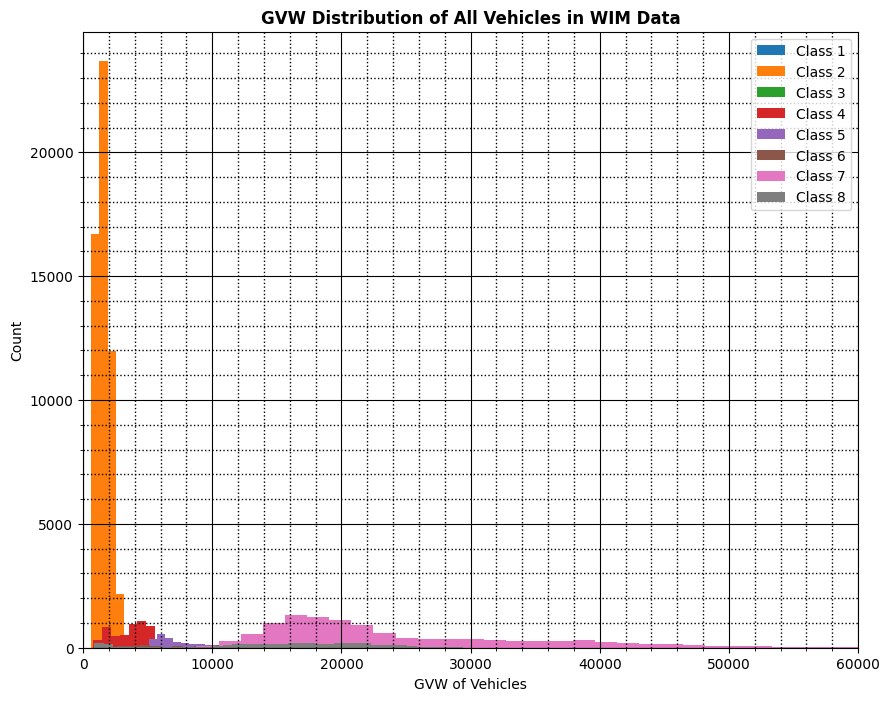

In [ ]:
# import_data()
# all_data= pd.read_excel('output.xlsx')

# def add_unit(axis: str):
#     if axis == 'Gap Time': 
#         axis += ' (s)'
#     elif axis == 'Total Weight': 
#         axis += ' (kg)'
#     elif axis == 'Speed': 
#         axis += ' (km/h)'
#     elif 'Axle Weight' in axis: 
#         axis += ' (kg)'
#     elif 'Axle Spacing' in axis: 
#         axis += ' (mm)'
#     return axis

import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()

ax.set_title(f'GVW Distribution of All Vehicles in WIM Data',fontweight='bold')
x_axis = all_data['Total Weight']

for index in range(1,9):
    label = 'Class ' + str(index)
    ax.hist(all_data[all_data['Class']==index]['Total Weight'], bins=50, label=label)

ax=reload(plt)
# if y_axis == 'Cumulative Probability':
#     fig.suptitle(f'CDF of {x_axis}')
# else:
    # fig.suptitle(f'{x_axis} against {y_axis}')

# print(f'{df.iloc[-1,0]}=')
ax.xlim(0,60000)
# Show the major grid and style it slightly.
plt.grid(True, which='both')
plt.grid(which='major', color='black', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
plt.grid(which='minor', color='black', linestyle=':', linewidth=1)
# Make the minor ticks and gridlines show.
plt.minorticks_on()

plt.legend(loc=0)

# x_axis = add_unit(x_axis)
# y_axis = add_unit(y_axis)

ax.xlabel('GVW of Vehicles')
ax.ylabel('Count')
ax.show()